In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from IPython.display import Image  
from sklearn import tree
import pydotplus
import itertools

# Модели с абсолютными величинами

In [4]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures_simple.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [5]:
df[['name', 'grade', 'num_tokens', 'num_acl', 'num_acl_relcl', 
'num_advcl', 'num_sents', 'num_cl', 'num_tu', 'num_coord', 
'poss', 'prep_ph', 'adj_n', 'ger_inf', 'part_n', 'num_vp',
'av_depth', 'min_depth', 'max_depth', 'num_ctu', 'mean_l_sim', 
'mean_length_s', 'mean_length_c', 'mean_p_sim', 'mean_tokens_root', 'nan']] = df['h'].str.split('\t',expand=True)

In [6]:
df.head()

,h,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,...,av_depth,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,nan
0,AAl_13_1\tbest\t283\t5\t1\t3\t11\t23\t23\t8\t2...,AAl_13_1,best,283,5,1,3,11,23,23,...,4.27,2,8,0,32.36,24.64,12.3043,26.07,7.82,
1,AAl_27_1\tbest\t211\t0\t0\t1\t10\t14\t14\t5\t2...,AAl_27_1,best,211,0,0,1,10,14,14,...,5.0,3,10,0,23.96,20,15.0714,19.56,5.6,
2,AAl_30_1\tbest\t231\t2\t1\t1\t13\t19\t19\t4\t1...,AAl_30_1,best,231,2,1,1,13,19,19,...,3.85,2,5,0,20.36,16.69,12.1579,16.58,6.46,
3,ZEv_3_1\tbest\t201\t4\t3\t2\t8\t14\t14\t7\t18\...,ZEv_3_1,best,201,4,3,2,8,14,14,...,4.75,3,7,0,26.89,24,14.3571,21.68,4.75,
4,EEm_14_1\tbest\t219\t4\t0\t6\t9\t18\t18\t3\t19...,EEm_14_1,best,219,4,0,6,9,18,18,...,5.44,4,7,0,24.75,23.22,12.1667,20.03,5.78,


In [7]:
df = df.drop(['h','nan'], axis=1)

In [8]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,...,num_vp,av_depth,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root
0,AAl_13_1,best,283,5,1,3,11,23,23,8,...,19,4.27,2,8,0,32.36,24.64,12.3043,26.07,7.82
1,AAl_27_1,best,211,0,0,1,10,14,14,5,...,12,5.0,3,10,0,23.96,20,15.0714,19.56,5.6
2,AAl_30_1,best,231,2,1,1,13,19,19,4,...,23,3.85,2,5,0,20.36,16.69,12.1579,16.58,6.46
3,ZEv_3_1,best,201,4,3,2,8,14,14,7,...,14,4.75,3,7,0,26.89,24,14.3571,21.68,4.75
4,EEm_14_1,best,219,4,0,6,9,18,18,3,...,22,5.44,4,7,0,24.75,23.22,12.1667,20.03,5.78


In [9]:
def best_non(row):
    if row['grade'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [10]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,...,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,283,5,1,3,11,23,23,8,...,2,8,0,32.36,24.64,12.3043,26.07,7.82,nonworst,best
1,AAl_27_1,best,211,0,0,1,10,14,14,5,...,3,10,0,23.96,20,15.0714,19.56,5.6,nonworst,best
2,AAl_30_1,best,231,2,1,1,13,19,19,4,...,2,5,0,20.36,16.69,12.1579,16.58,6.46,nonworst,best
3,ZEv_3_1,best,201,4,3,2,8,14,14,7,...,3,7,0,26.89,24,14.3571,21.68,4.75,nonworst,best
4,EEm_14_1,best,219,4,0,6,9,18,18,3,...,4,7,0,24.75,23.22,12.1667,20.03,5.78,nonworst,best


In [11]:
df_best_non = df.drop(['grade', 'name', 'mark_worst_nonworst'], axis=1)

In [12]:
df_best_non.head()

,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,poss,prep_ph,...,av_depth,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,mark_best_nonbest
0,283,5,1,3,11,23,23,8,21,33,...,4.27,2,8,0,32.36,24.64,12.3043,26.07,7.82,best
1,211,0,0,1,10,14,14,5,25,44,...,5.0,3,10,0,23.96,20,15.0714,19.56,5.6,best
2,231,2,1,1,13,19,19,4,13,37,...,3.85,2,5,0,20.36,16.69,12.1579,16.58,6.46,best
3,201,4,3,2,8,14,14,7,18,32,...,4.75,3,7,0,26.89,24,14.3571,21.68,4.75,best
4,219,4,0,6,9,18,18,3,19,37,...,5.44,4,7,0,24.75,23.22,12.1667,20.03,5.78,best


In [13]:
df_best_non.shape

(95, 24)

In [14]:
y = df_best_non.values[:, df_best_non.shape[1]-1]

In [15]:
y

array(['best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest',
       'nonbest', 'nonbest', 'nonbest', 'nonbest', 'nonbest', 'non

In [16]:
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

# Корреляция признаков

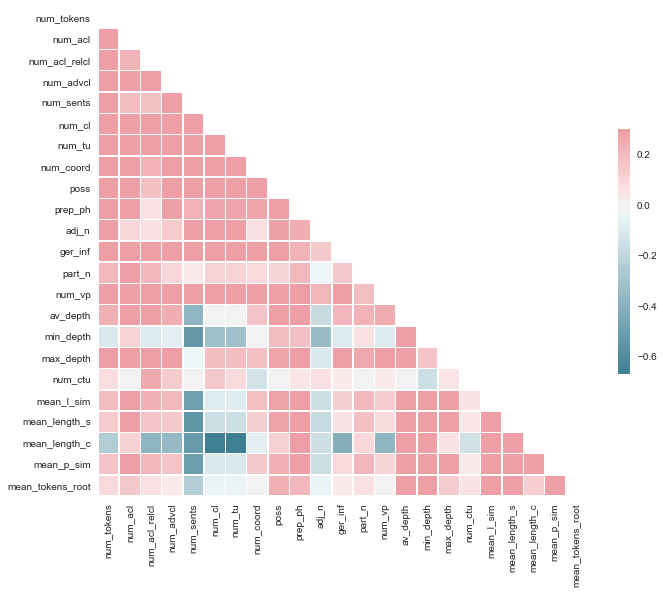

In [17]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

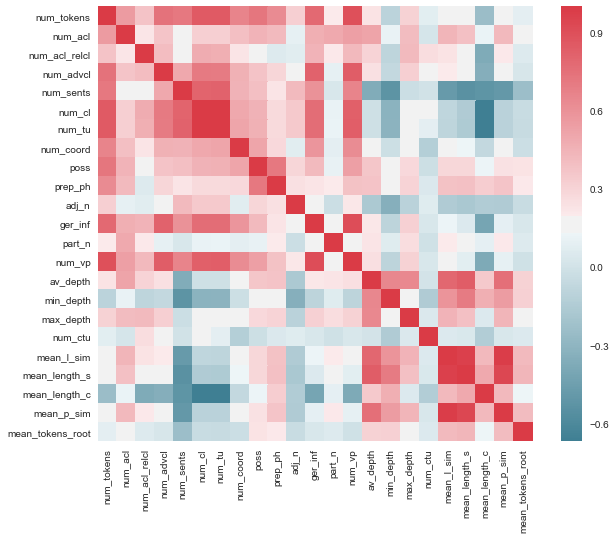

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Разделение на тестовую и тренировочную выборку

In [19]:
from sklearn.model_selection import StratifiedKFold

**Примерно:**

Всего: 95 эссе (38 (40%) best; 57 (60%) nonbest)

Тестовая выборка (20%): 19(8 (40%) best; 11 (60%) nonbest)

Тренировочная выборка (80%): 76(30 (40%) best; 46 (60%) nonbest)

In [20]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 75 essays ): [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 0  1  2  3  4  5  6  7 38 39 40 41 42 43 44 45 46 47 48 49]
TRAIN ( 75 essays ): [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 8  9 10 11 12 13 14 15 50 51 52 53 54 55 56 57 58 59 60 61]
TRAIN ( 76 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94] TEST ( 19 essays ): [16 17 18 19 20 21 22 23 62 63 64 65 66 67 68 69 70 71 72]
T

# Дерево решений

In [21]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
y_pred = clf1.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       0.50      0.57      0.53         7
    nonbest       0.70      0.64      0.67        11

avg / total       0.62      0.61      0.61        18



In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.coolwarm):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

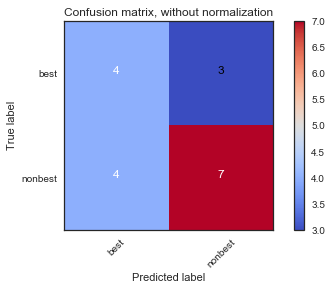

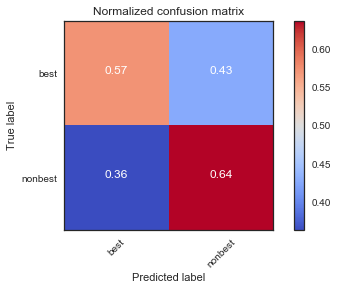

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.61


# Дерево решений с выбором лучших гиперпараметров

In [27]:
X_df_best_non.shape[1]

23

In [28]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 23)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [29]:
y_pred = clf1.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.43      0.60         7
    nonbest       0.73      1.00      0.85        11

avg / total       0.84      0.78      0.75        18



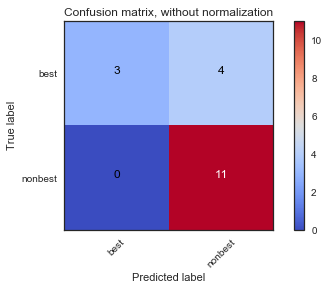

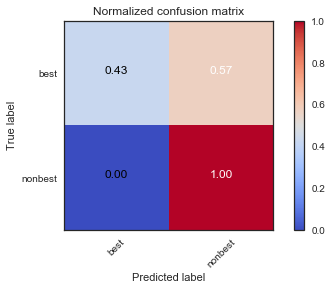

In [31]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [32]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.78


In [33]:
import collections

Feature ranking:
    importance      name_feature
7     0.311738         num_coord
11    0.162746           ger_inf
0     0.087498        num_tokens
18    0.087150        mean_l_sim
2     0.066705     num_acl_relcl
3     0.061909         num_advcl
8     0.040716              poss
10    0.035385             adj_n
20    0.035152     mean_length_c
15    0.033232         min_depth
13    0.030559            num_vp
4     0.028821         num_sents
16    0.018389         max_depth
1     0.000000           num_acl
12    0.000000            part_n
14    0.000000          av_depth
9     0.000000           prep_ph
17    0.000000           num_ctu
6     0.000000            num_tu
19    0.000000     mean_length_s
5     0.000000            num_cl
21    0.000000        mean_p_sim
22    0.000000  mean_tokens_root


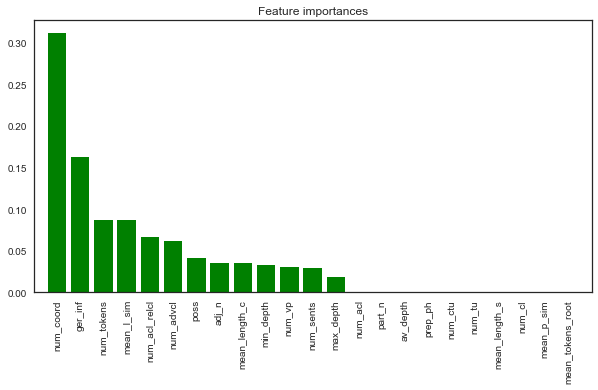

In [34]:
imp(clf1, X_df_best_non.columns)

In [35]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=4, max_features=6) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

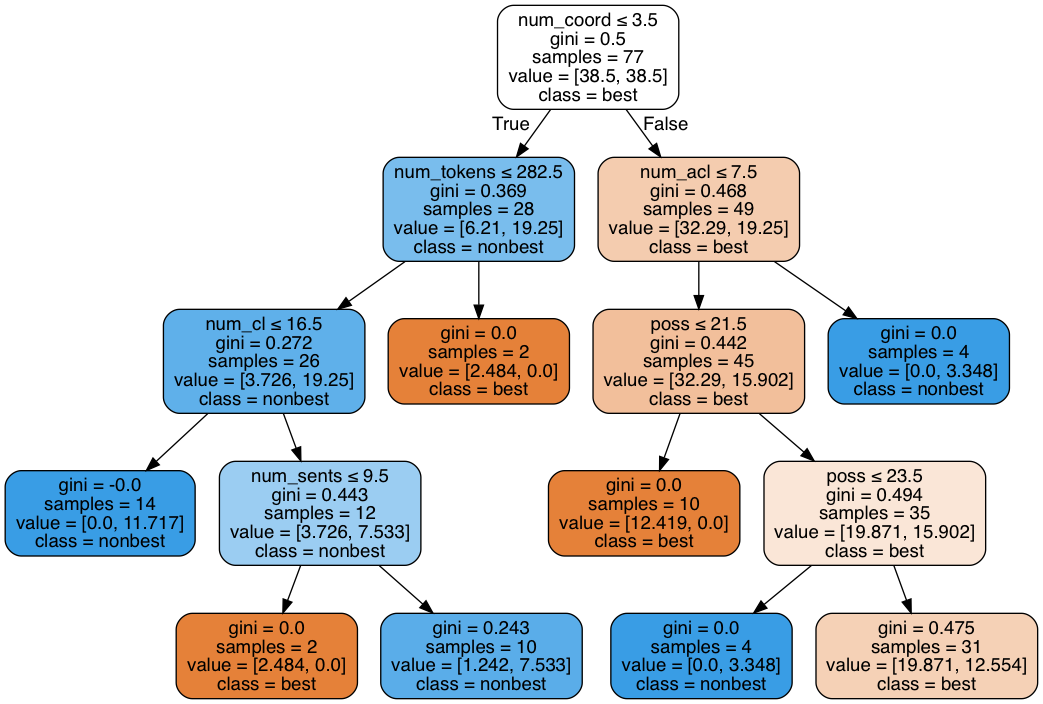

In [36]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [37]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_pred = clf2.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.57      0.73         7
    nonbest       0.79      1.00      0.88        11

avg / total       0.87      0.83      0.82        18



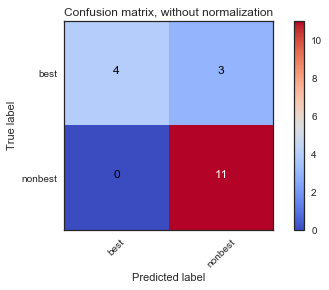

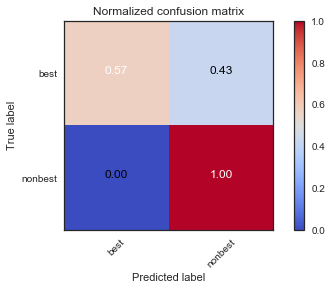

In [40]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [41]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.83


# RandomForestClassifier с выбором лучших гиперпараметров

In [42]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

In [43]:
y_test_1

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

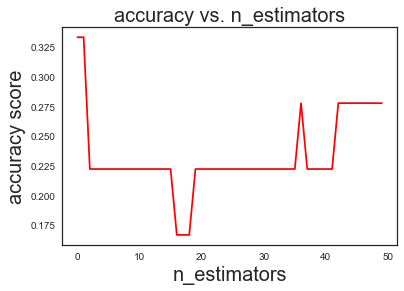

In [44]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [45]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=20, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 23), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [46]:
clf2.best_params_

{'max_depth': 7, 'max_features': 1}

In [47]:
y_pred = clf2.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.43      0.60         7
    nonbest       0.73      1.00      0.85        11

avg / total       0.84      0.78      0.75        18



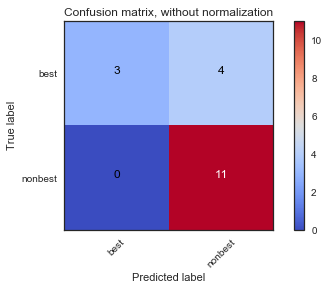

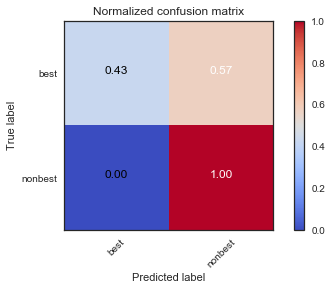

In [49]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [50]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.78


Feature ranking:
    importance      name_feature
20    0.083569     mean_length_c
0     0.080070        num_tokens
9     0.069410           prep_ph
21    0.066730        mean_p_sim
2     0.063589     num_acl_relcl
6     0.058041            num_tu
13    0.050815            num_vp
10    0.050476             adj_n
14    0.050281          av_depth
19    0.047424     mean_length_s
4     0.046485         num_sents
3     0.041933         num_advcl
11    0.035407           ger_inf
8     0.034881              poss
5     0.034317            num_cl
22    0.034124  mean_tokens_root
7     0.028617         num_coord
16    0.027245         max_depth
18    0.023939        mean_l_sim
15    0.022386         min_depth
12    0.021474            part_n
1     0.016562           num_acl
17    0.012225           num_ctu


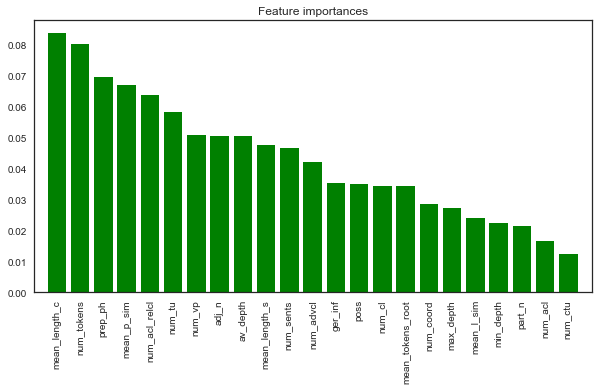

In [51]:
imp(clf2, X_df_best_non.columns)

# LogisticRegression c важными признаками ('l1')

In [52]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
y_pred = clf3.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.29      0.44         7
    nonbest       0.69      1.00      0.81        11

avg / total       0.81      0.72      0.67        18



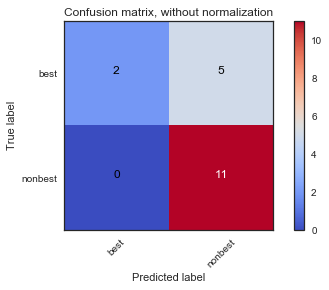

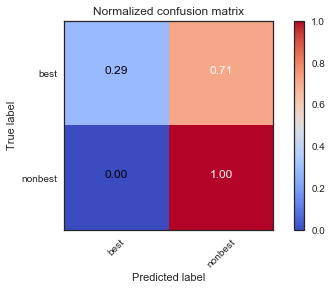

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [56]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.72


# LogisticRegression с лучшими гиперпараметрами

In [57]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
clf3.best_params_

{'C': 2.7825594022071245}

In [59]:
y_pred = clf3.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       best       1.00      0.43      0.60         7
    nonbest       0.73      1.00      0.85        11

avg / total       0.84      0.78      0.75        18



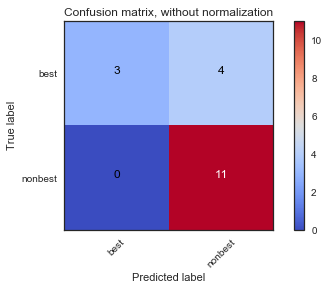

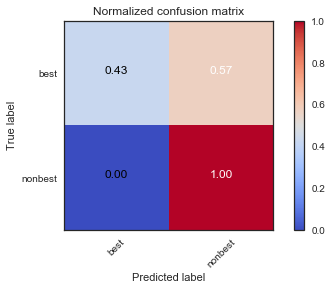

In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [62]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.78


In [63]:
def imp2(clf_grid, feature_names):
    importances = 100.0 * (abs(clf_grid.coef_[0]) / abs(clf_grid.coef_[0]).max())
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Relative feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [65]:
clf3 = LogisticRegression(penalty='l1', C=2.7825594022071245)
clf3.fit(X_train, y_train)

LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Feature ranking:
    importance      name_feature
4   100.000000         num_sents
20   57.729872     mean_length_c
19   48.475201     mean_length_s
6    41.016950            num_tu
7    29.591174         num_coord
3    23.182971         num_advcl
12   22.650088            part_n
2    20.384019     num_acl_relcl
8    17.161361              poss
1    12.825895           num_acl
21   12.464062        mean_p_sim
13   12.063719            num_vp
10   10.387269             adj_n
17    8.834166           num_ctu
16    5.443461         max_depth
14    4.947673          av_depth
11    4.506918           ger_inf
0     4.171321        num_tokens
9     2.695272           prep_ph
18    0.000000        mean_l_sim
15    0.000000         min_depth
5     0.000000            num_cl
22    0.000000  mean_tokens_root


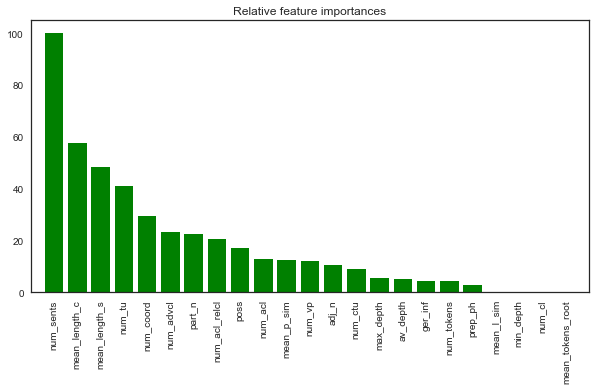

In [66]:
imp2(clf3, X_df_best_non.columns)

# Разделение на три класса

In [67]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,...,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,283,5,1,3,11,23,23,8,...,2,8,0,32.36,24.64,12.3043,26.07,7.82,nonworst,best
1,AAl_27_1,best,211,0,0,1,10,14,14,5,...,3,10,0,23.96,20,15.0714,19.56,5.6,nonworst,best
2,AAl_30_1,best,231,2,1,1,13,19,19,4,...,2,5,0,20.36,16.69,12.1579,16.58,6.46,nonworst,best
3,ZEv_3_1,best,201,4,3,2,8,14,14,7,...,3,7,0,26.89,24,14.3571,21.68,4.75,nonworst,best
4,EEm_14_1,best,219,4,0,6,9,18,18,3,...,4,7,0,24.75,23.22,12.1667,20.03,5.78,nonworst,best


In [68]:
df_three = df.drop(['name', 'mark_best_nonbest', 'mark_worst_nonworst'], axis=1)

In [69]:
df_three.head()

,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,poss,...,num_vp,av_depth,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root
0,best,283,5,1,3,11,23,23,8,21,...,19,4.27,2,8,0,32.36,24.64,12.3043,26.07,7.82
1,best,211,0,0,1,10,14,14,5,25,...,12,5.0,3,10,0,23.96,20,15.0714,19.56,5.6
2,best,231,2,1,1,13,19,19,4,13,...,23,3.85,2,5,0,20.36,16.69,12.1579,16.58,6.46
3,best,201,4,3,2,8,14,14,7,18,...,14,4.75,3,7,0,26.89,24,14.3571,21.68,4.75
4,best,219,4,0,6,9,18,18,3,19,...,22,5.44,4,7,0,24.75,23.22,12.1667,20.03,5.78


In [70]:
y = df_three.values[:, 0]

In [71]:
y

array(['best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'best', 'best',
       'best', 'best', 'best', 'best', 'best', 'best', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'aver',
       'aver', 'aver', 'aver', 'aver', 'aver', 'aver', 'worst', 'worst',
       'worst', 'worst', 'worst', 'worst', 'worst', 'worst', 'worst',
       'worst', 'worst', 'worst', 'worst', 'worst', 'worst', 'worst',
       'worst'], dtype=object)

In [72]:
X_three = df_three.drop(['grade'], axis=1)
X_three[X_three.columns] = X_three[X_three.columns].astype(float)
X = X_three.values[:, 0:X_three.shape[1]]

In [73]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

5

In [74]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 75 essays ): [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 0  1  2  3  4  5  6  7 38 39 40 41 42 43 44 45 78 79 80 81]
TRAIN ( 75 essays ): [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 8  9 10 11 12 13 14 15 46 47 48 49 50 51 52 53 82 83 84 85]
TRAIN ( 76 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 89 90
 91 92 93 94] TEST ( 19 essays ): [16 17 18 19 20 21 22 23 54 55 56 57 58 59 60 61 86 87 88]
T

# LogisticRegression c важными признаками ('l1')

In [75]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
y_pred = clf3.predict(X_test)

In [77]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.50      0.50      0.50         8
       best       0.43      0.43      0.43         7
      worst       1.00      1.00      1.00         3

avg / total       0.56      0.56      0.56        18



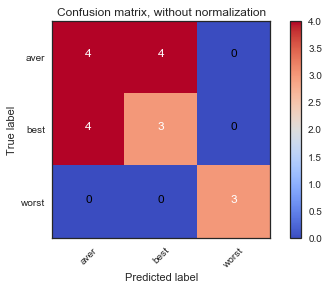

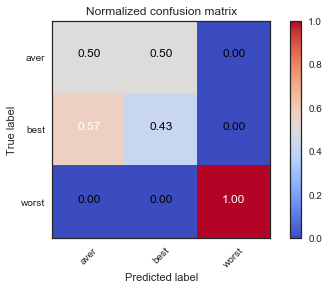

In [78]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [79]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.56


# LogisticRegression с лучшими гиперпараметрами

In [80]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
y_pred = clf3.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.50      0.50      0.50         8
       best       0.43      0.43      0.43         7
      worst       1.00      1.00      1.00         3

avg / total       0.56      0.56      0.56        18



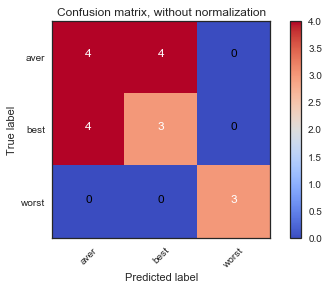

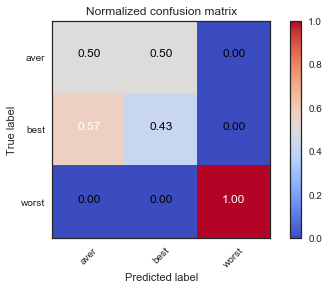

In [83]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [84]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.56


In [85]:
clf3.best_params_

{'C': 1.0}

In [86]:
clf3 = LogisticRegression(penalty='l1', C=1.0)
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Feature ranking:
    importance      name_feature
12  100.000000            part_n
19   96.221270     mean_length_s
21   80.444693        mean_p_sim
15   71.257351         min_depth
20   70.986779     mean_length_c
7    34.114951         num_coord
16   26.978286         max_depth
6    26.751807            num_tu
9    24.383861           prep_ph
13   23.869863            num_vp
1    19.989424           num_acl
5    19.747249            num_cl
4    18.201484         num_sents
11   16.532080           ger_inf
22   14.831206  mean_tokens_root
10    6.823682             adj_n
3     6.154051         num_advcl
8     4.736259              poss
2     0.284996     num_acl_relcl
14    0.000000          av_depth
17    0.000000           num_ctu
18    0.000000        mean_l_sim
0     0.000000        num_tokens


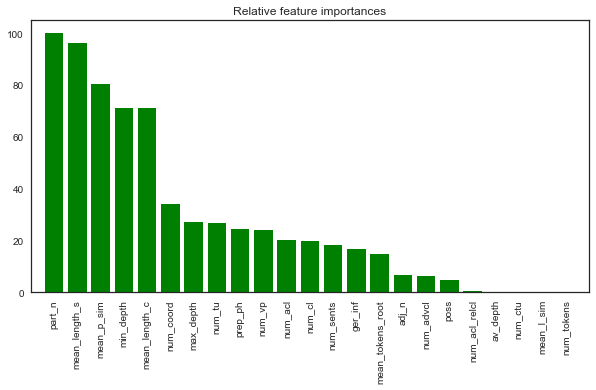

In [87]:
imp2(clf3, X_three.columns)

# Дерево решений

In [88]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [89]:
y_pred = clf1.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.14      0.12      0.13         8
       best       0.14      0.14      0.14         7
      worst       0.75      1.00      0.86         3

avg / total       0.24      0.28      0.26        18



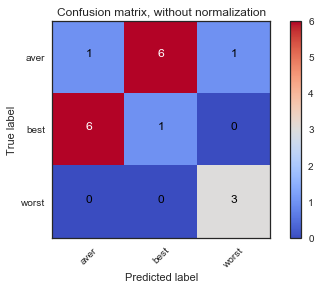

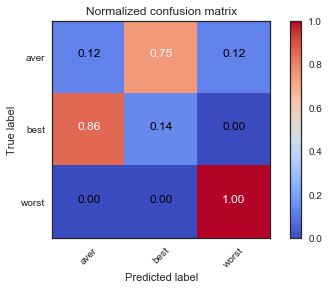

In [91]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [92]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.28


# Дерево решений с выбором лучших гиперпараметров

In [93]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 23)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [94]:
y_pred = clf1.predict(X_test)

In [95]:
print(classification_report(y_test, y_pred)) 

             precision    recall  f1-score   support

       aver       0.00      0.00      0.00         8
       best       0.47      1.00      0.64         7
      worst       0.67      0.67      0.67         3

avg / total       0.29      0.50      0.36        18



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


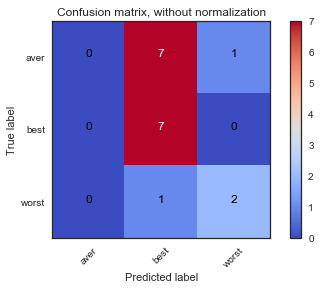

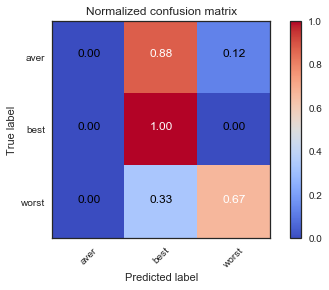

In [96]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [97]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.5


Feature ranking:
    importance      name_feature
9     0.461368           prep_ph
13    0.268498            num_vp
3     0.130228         num_advcl
10    0.067886             adj_n
12    0.061734            part_n
1     0.010286           num_acl
0     0.000000        num_tokens
15    0.000000         min_depth
21    0.000000        mean_p_sim
20    0.000000     mean_length_c
19    0.000000     mean_length_s
18    0.000000        mean_l_sim
17    0.000000           num_ctu
16    0.000000         max_depth
11    0.000000           ger_inf
14    0.000000          av_depth
8     0.000000              poss
7     0.000000         num_coord
6     0.000000            num_tu
5     0.000000            num_cl
4     0.000000         num_sents
2     0.000000     num_acl_relcl
22    0.000000  mean_tokens_root


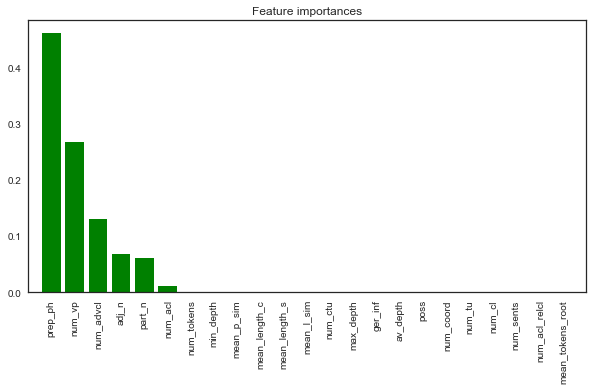

In [98]:
imp(clf1, X_three.columns)

In [99]:
clf1.best_params_

{'max_depth': 3, 'max_features': 7}

In [100]:
clf1 = DecisionTreeClassifier(max_depth=3, max_features=7) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

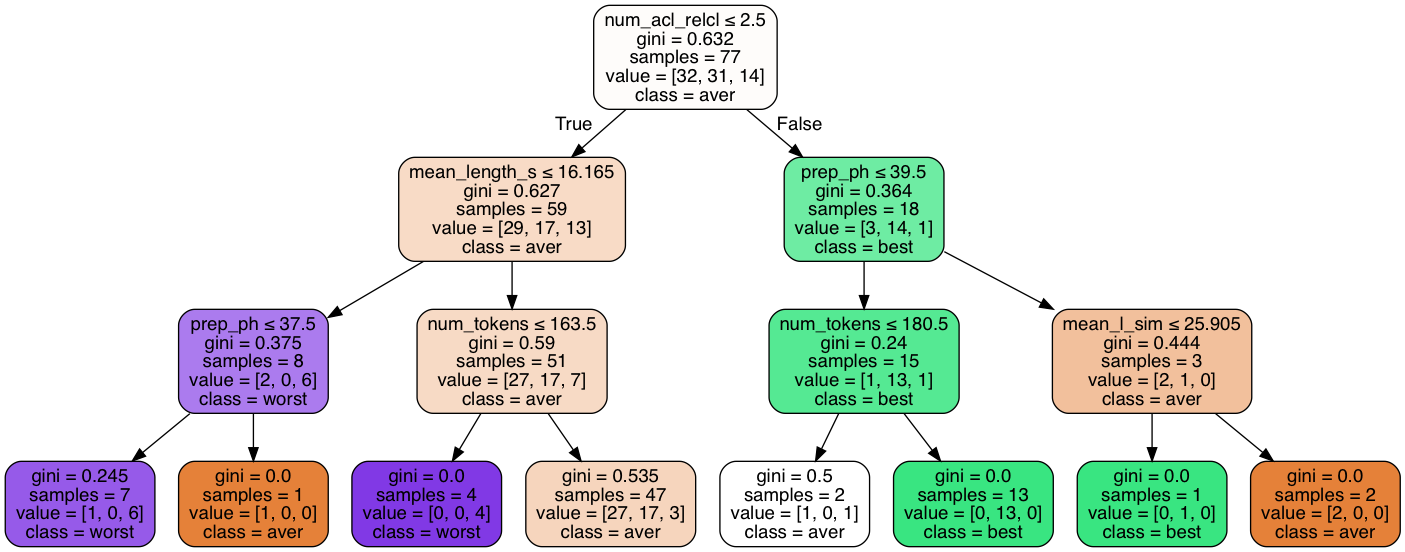

In [101]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [102]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [103]:
y_pred = clf2.predict(X_test)

In [104]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.55      0.75      0.63         8
       best       0.50      0.29      0.36         7
      worst       1.00      1.00      1.00         3

avg / total       0.60      0.61      0.59        18



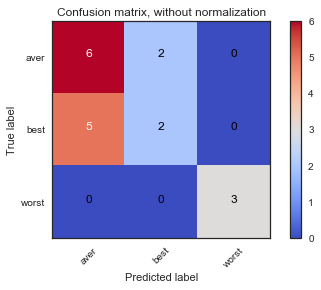

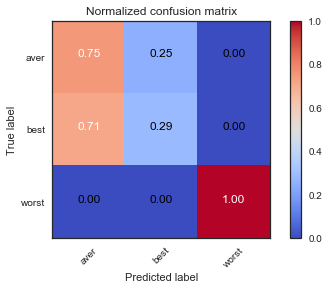

In [105]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [106]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.61


# RandomForestClassifier с выбором лучших гиперпараметров

In [107]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    elif x == 'worst':
        y_test_1.append(0)
    else:
        y_test_1.append(2)

In [108]:
y_test_1

[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0]

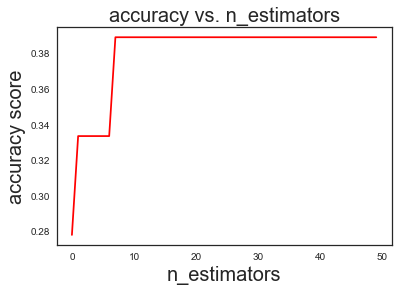

In [109]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=10, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [110]:
parameters = {
    'max_features': range(1, X_three.shape[1]),
    'max_depth' : range(1, 30),
}
clf_rfc = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf_rfc, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 23), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [111]:
y_pred = clf2.predict(X_test)

In [112]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

       aver       0.50      0.75      0.60         8
       best       0.33      0.14      0.20         7
      worst       1.00      1.00      1.00         3

avg / total       0.52      0.56      0.51        18



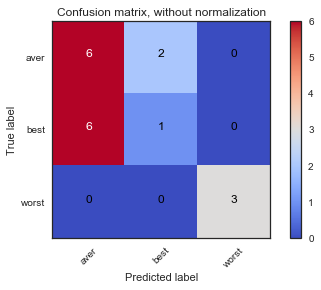

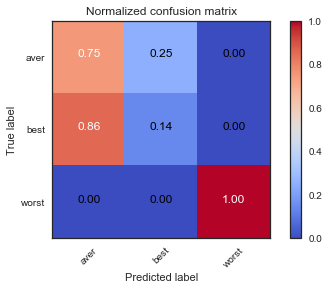

In [113]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [114]:
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Accuracy:  0.56


Feature ranking:
    importance      name_feature
3     0.139689         num_advcl
8     0.129310              poss
0     0.106520        num_tokens
21    0.070287        mean_p_sim
18    0.067260        mean_l_sim
9     0.058320           prep_ph
5     0.055077            num_cl
22    0.041755  mean_tokens_root
2     0.040905     num_acl_relcl
6     0.037446            num_tu
13    0.037303            num_vp
16    0.032637         max_depth
19    0.031060     mean_length_s
17    0.030345           num_ctu
7     0.023080         num_coord
12    0.021540            part_n
11    0.020501           ger_inf
1     0.014498           num_acl
10    0.014086             adj_n
14    0.012168          av_depth
20    0.008618     mean_length_c
15    0.005440         min_depth
4     0.002156         num_sents


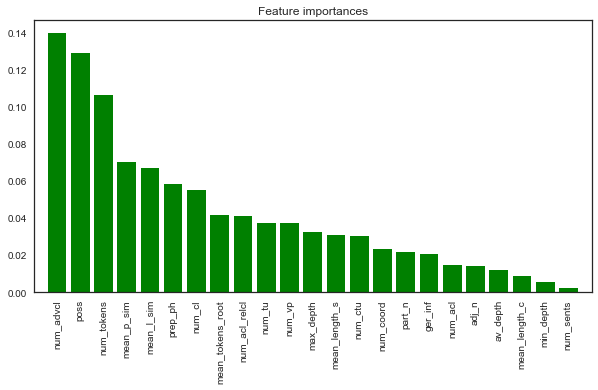

In [115]:
imp(clf2, X_three.columns)

# Worst vs nonworst

In [116]:
df.head()

,name,grade,num_tokens,num_acl,num_acl_relcl,num_advcl,num_sents,num_cl,num_tu,num_coord,...,min_depth,max_depth,num_ctu,mean_l_sim,mean_length_s,mean_length_c,mean_p_sim,mean_tokens_root,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,283,5,1,3,11,23,23,8,...,2,8,0,32.36,24.64,12.3043,26.07,7.82,nonworst,best
1,AAl_27_1,best,211,0,0,1,10,14,14,5,...,3,10,0,23.96,20,15.0714,19.56,5.6,nonworst,best
2,AAl_30_1,best,231,2,1,1,13,19,19,4,...,2,5,0,20.36,16.69,12.1579,16.58,6.46,nonworst,best
3,ZEv_3_1,best,201,4,3,2,8,14,14,7,...,3,7,0,26.89,24,14.3571,21.68,4.75,nonworst,best
4,EEm_14_1,best,219,4,0,6,9,18,18,3,...,4,7,0,24.75,23.22,12.1667,20.03,5.78,nonworst,best


In [117]:
df_worst_non = df.drop(['grade', 'name', 'mark_best_nonbest'], axis=1)

In [118]:
y = df_worst_non.values[:, df_worst_non.shape[1]-1]

In [119]:
y

array(['nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonworst',
       'nonworst', 'nonworst', 'nonworst', 'nonworst', 'nonwor

In [120]:
X_worst = df_worst_non.drop(['mark_worst_nonworst'], axis=1)
X_worst[X_worst.columns] = X_worst[X_worst.columns].astype(float)
X = X_worst.values[:, 0:X_worst.shape[1]]

In [121]:
skf = StratifiedKFold(n_splits=2, shuffle=False, random_state=0)
skf.get_n_splits(X, y)

2

In [122]:
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 47 essays ): [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 87 88 89 90 91 92 93 94] TEST ( 48 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 78 79 80 81 82 83 84 85 86]
TRAIN ( 48 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 78 79 80 81 82 83 84 85 86] TEST ( 47 essays ): [39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 87 88 89 90 91 92 93 94]


# Дерево решений

In [123]:
clf1 = DecisionTreeClassifier() 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

   nonworst       0.93      0.72      0.81        39
      worst       0.35      0.75      0.48         8

avg / total       0.83      0.72      0.76        47



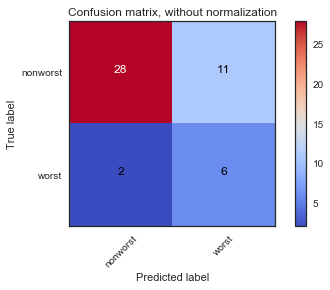

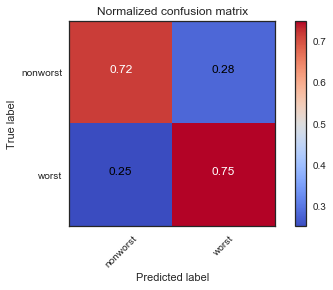

Accuracy:  0.72


In [124]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# Дерево решений с подбором лучших гиперпараметров

In [125]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 101), 'max_features': range(1, 23)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.89      0.82      0.85        39
      worst       0.36      0.50      0.42         8

avg / total       0.80      0.77      0.78        47



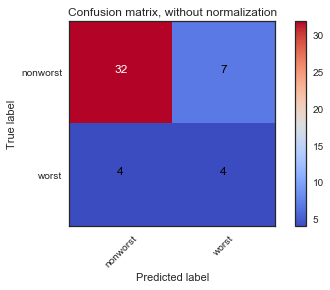

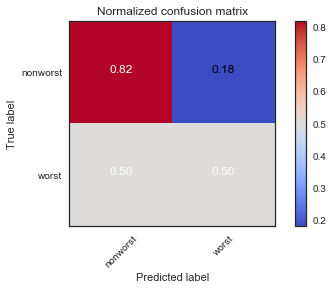

Accuracy:  0.77


In [126]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf1.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
6     0.690476            num_tu
8     0.211039              poss
3     0.098485         num_advcl
0     0.000000        num_tokens
13    0.000000            num_vp
21    0.000000        mean_p_sim
20    0.000000     mean_length_c
19    0.000000     mean_length_s
18    0.000000        mean_l_sim
17    0.000000           num_ctu
16    0.000000         max_depth
15    0.000000         min_depth
14    0.000000          av_depth
11    0.000000           ger_inf
12    0.000000            part_n
1     0.000000           num_acl
10    0.000000             adj_n
9     0.000000           prep_ph
7     0.000000         num_coord
5     0.000000            num_cl
4     0.000000         num_sents
2     0.000000     num_acl_relcl
22    0.000000  mean_tokens_root


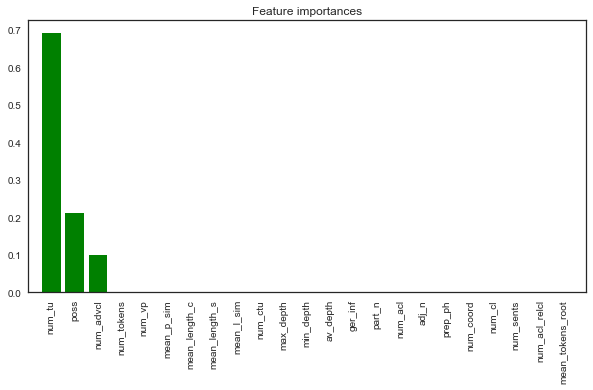

In [127]:
imp(clf1, X_worst.columns)

In [128]:
clf1.best_params_

{'max_depth': 3, 'max_features': 7}

In [129]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=3, max_features=7)
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

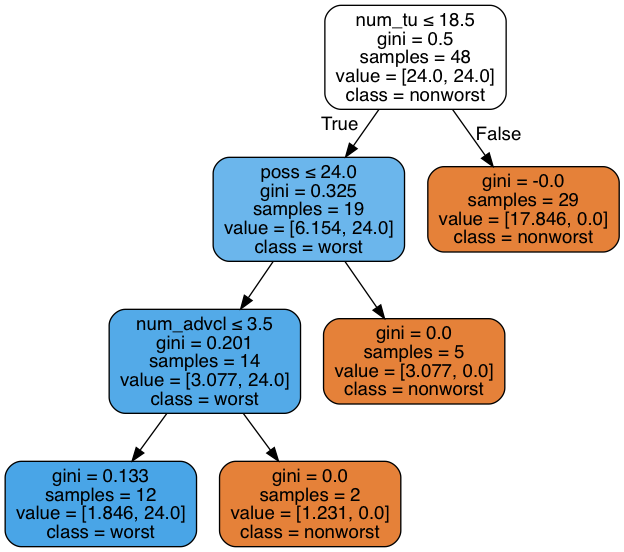

In [130]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [131]:
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.87      0.87      0.87        39
      worst       0.38      0.38      0.38         8

avg / total       0.79      0.79      0.79        47



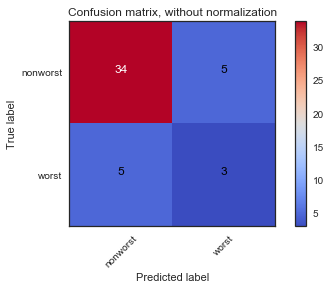

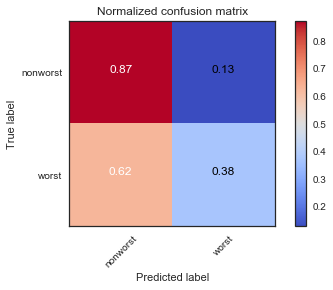

Accuracy:  0.79


In [132]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# RandomForestClassifier c выбором лучших гиперпараметров

In [133]:
y_test_1 = []
for x in y_test:
    if x == 'worst':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

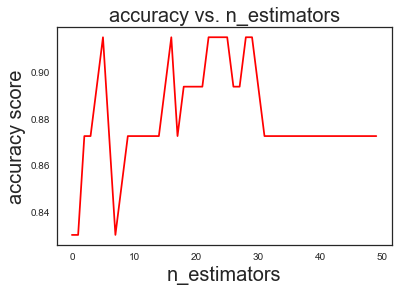

In [134]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [135]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=35, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=35, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 23), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

   nonworst       0.94      0.82      0.88        39
      worst       0.46      0.75      0.57         8

avg / total       0.86      0.81      0.82        47



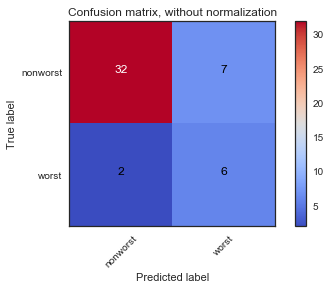

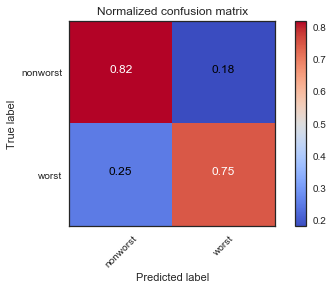

Accuracy:  0.81


In [136]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
0     0.122361        num_tokens
11    0.096001           ger_inf
5     0.083104            num_cl
13    0.081829            num_vp
8     0.066832              poss
7     0.066019         num_coord
19    0.058678     mean_length_s
9     0.052801           prep_ph
21    0.049796        mean_p_sim
3     0.047483         num_advcl
6     0.042821            num_tu
22    0.032837  mean_tokens_root
20    0.029938     mean_length_c
1     0.029505           num_acl
18    0.028395        mean_l_sim
4     0.027993         num_sents
2     0.025675     num_acl_relcl
14    0.021721          av_depth
10    0.019536             adj_n
16    0.005254         max_depth
12    0.004983            part_n
15    0.004936         min_depth
17    0.001502           num_ctu


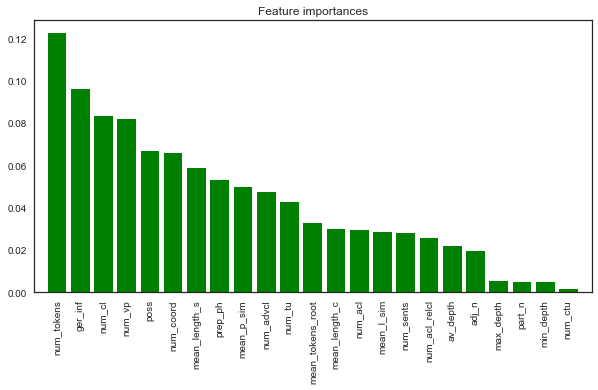

In [137]:
imp(clf2, X_worst.columns)

# LogisticRegression c важными признаками ('l1')

In [138]:
clf3 = LogisticRegression(penalty='l1')
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

             precision    recall  f1-score   support

   nonworst       0.94      0.85      0.89        39
      worst       0.50      0.75      0.60         8

avg / total       0.87      0.83      0.84        47



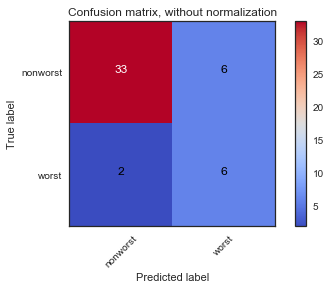

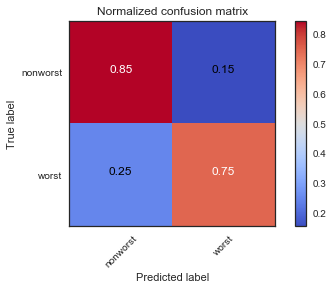

Accuracy:  0.83


In [139]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

# LogisticRegression с лучшими гиперпараметрами

In [140]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

             precision    recall  f1-score   support

   nonworst       0.94      0.85      0.89        39
      worst       0.50      0.75      0.60         8

avg / total       0.87      0.83      0.84        47



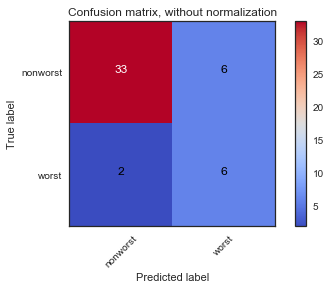

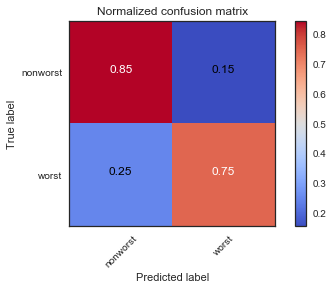

Accuracy:  0.83


In [141]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf3.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

In [142]:
clf3.best_params_

{'C': 1.0}

In [143]:
clf3 = LogisticRegression(penalty='l1', C=1.0)
clf3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Feature ranking:
    importance      name_feature
4   100.000000         num_sents
3    62.422796         num_advcl
22   61.475358  mean_tokens_root
1    42.222267           num_acl
7    25.127584         num_coord
10   24.086487             adj_n
16   23.310368         max_depth
0     9.652209        num_tokens
9     8.558448           prep_ph
13    4.957851            num_vp
8     2.713924              poss
19    2.448471     mean_length_s
21    1.482461        mean_p_sim
20    0.936207     mean_length_c
6     0.000000            num_tu
5     0.000000            num_cl
12    0.000000            part_n
14    0.000000          av_depth
15    0.000000         min_depth
2     0.000000     num_acl_relcl
17    0.000000           num_ctu
18    0.000000        mean_l_sim
11    0.000000           ger_inf


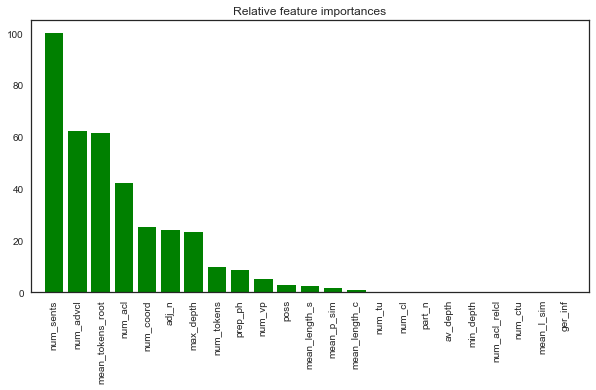

In [144]:
imp2(clf3, X_worst.columns)

# Важность признаков

In [145]:
def imp(clf_grid, feature_names):
    importances = clf_grid.best_estimator_.feature_importances_
    #print(clf_grid.best_estimator_)
    if isinstance(clf_grid.best_estimator_, collections.Iterable):
        std = np.std([clf_grid.best_estimator_.feature_importances_ for tree in clf_grid.best_estimator_],
             axis=0)
    else:
        std = clf1.best_estimator_.feature_importances_
    #print(std)
    indices = np.argsort(importances)[::-1]
    d = {'importance': importances, 'name_feature': feature_names}
    
    # Print the feature ranking
    df_importance = pd.DataFrame(data=d)
    df_importance = df_importance.sort_values(by=['importance'], ascending=False)
    print("Feature ranking:")

    print(df_importance)

    # Plot the feature importances of the forest
    plt.figure(figsize=(10,5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
       color="g")
    plt.xticks(range(X.shape[1]), df_importance['name_feature'], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

# С большим количеством признаков

In [146]:
df = pd.read_csv('/Users/irene/Desktop/Курсовая/res_measures.csv',
                       sep=';', encoding='utf-8', names = 'h')

In [147]:
df[['name', 'grade', 'num_acl', 'num_acl_relcl', 'num_advcl', 'num_tokens',
    'num_sents', 'num_cl', 'num_tu', 'num_coord', 'num_np', 'num_vp',
    'av_depth', 'min_depth', 'max_depth', 'num_ctu', 'mean_l_sim', 'mean_p_sim',
    'mean_tokens_root', 'mean_length_s', 'mean_length_c', 'c_s', 'c_t', 'acl_t',
    'acl_relcl_t', 'advcl_t', 'acl_cl', 'acl_relcl_cl', 'advcl_cl', 'coord_cl',
    't_s', 'poss_s', 'prep_s', 'adj_n_s', 'ger_inf_s', 'part_n_s', 'vp_s', 'nan']] = df['h'].str.split('\t',expand=True)

In [148]:
df.head()

,h,name,grade,num_acl,num_acl_relcl,num_advcl,num_tokens,num_sents,num_cl,num_tu,...,advcl_cl,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,vp_s,nan
0,AAl_13_1\tbest\t5\t1\t3\t283\t11\t23\t23\t8\t6...,AAl_13_1,best,5,1,3,283,11,23,23,...,0.13,0.348,2.091,1.909,3.0,0.273,0.545,0.273,1.727,
1,AAl_27_1\tbest\t0\t0\t1\t211\t10\t14\t14\t5\t7...,AAl_27_1,best,0,0,1,211,10,14,14,...,0.071,0.357,1.4,2.5,4.4,0.2,0.6,0.0,1.2,
2,AAl_30_1\tbest\t2\t1\t1\t231\t13\t19\t19\t4\t6...,AAl_30_1,best,2,1,1,231,13,19,19,...,0.053,0.211,1.462,1.0,2.846,0.231,0.846,0.077,1.769,
3,ZEv_3_1\tbest\t4\t3\t2\t201\t8\t14\t14\t7\t57\...,ZEv_3_1,best,4,3,2,201,8,14,14,...,0.143,0.5,1.75,2.25,4.0,0.5,0.25,0.125,1.75,
4,EEm_14_1\tbest\t4\t0\t6\t219\t9\t18\t18\t3\t70...,EEm_14_1,best,4,0,6,219,9,18,18,...,0.333,0.167,2.0,2.111,4.111,0.333,1.111,0.111,2.444,


In [149]:
df = df.drop(['h','nan'], axis=1)

In [150]:
df.head()

,name,grade,num_acl,num_acl_relcl,num_advcl,num_tokens,num_sents,num_cl,num_tu,num_coord,...,acl_relcl_cl,advcl_cl,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,vp_s
0,AAl_13_1,best,5,1,3,283,11,23,23,8,...,0.043,0.13,0.348,2.091,1.909,3.0,0.273,0.545,0.273,1.727
1,AAl_27_1,best,0,0,1,211,10,14,14,5,...,0.0,0.071,0.357,1.4,2.5,4.4,0.2,0.6,0.0,1.2
2,AAl_30_1,best,2,1,1,231,13,19,19,4,...,0.053,0.053,0.211,1.462,1.0,2.846,0.231,0.846,0.077,1.769
3,ZEv_3_1,best,4,3,2,201,8,14,14,7,...,0.214,0.143,0.5,1.75,2.25,4.0,0.5,0.25,0.125,1.75
4,EEm_14_1,best,4,0,6,219,9,18,18,3,...,0.0,0.333,0.167,2.0,2.111,4.111,0.333,1.111,0.111,2.444


In [151]:
def best_non(row):
    if row['grade'] == 'best':
        val = 'best'
    else:
        val = 'nonbest'
    return val

def worst_non(row):
    if row['grade'] == 'worst':
        val = 'worst'
    else:
        val = 'nonworst'
    return val

df['mark_worst_nonworst'] = df.apply(worst_non, axis=1)
df['mark_best_nonbest'] = df.apply(best_non, axis=1)

In [152]:
df.head()

,name,grade,num_acl,num_acl_relcl,num_advcl,num_tokens,num_sents,num_cl,num_tu,num_coord,...,coord_cl,t_s,poss_s,prep_s,adj_n_s,ger_inf_s,part_n_s,vp_s,mark_worst_nonworst,mark_best_nonbest
0,AAl_13_1,best,5,1,3,283,11,23,23,8,...,0.348,2.091,1.909,3.0,0.273,0.545,0.273,1.727,nonworst,best
1,AAl_27_1,best,0,0,1,211,10,14,14,5,...,0.357,1.4,2.5,4.4,0.2,0.6,0.0,1.2,nonworst,best
2,AAl_30_1,best,2,1,1,231,13,19,19,4,...,0.211,1.462,1.0,2.846,0.231,0.846,0.077,1.769,nonworst,best
3,ZEv_3_1,best,4,3,2,201,8,14,14,7,...,0.5,1.75,2.25,4.0,0.5,0.25,0.125,1.75,nonworst,best
4,EEm_14_1,best,4,0,6,219,9,18,18,3,...,0.167,2.0,2.111,4.111,0.333,1.111,0.111,2.444,nonworst,best


In [153]:
df_best_non = df.drop(['grade', 'name', 'mark_worst_nonworst'], axis=1)
y = df_best_non.values[:, df_best_non.shape[1]-1]
X_df_best_non = df_best_non.drop(['mark_best_nonbest'], axis=1)
X_df_best_non[X_df_best_non.columns] = X_df_best_non[X_df_best_non.columns].astype(float)
X = X_df_best_non.values[:, 0:X_df_best_non.shape[1]]

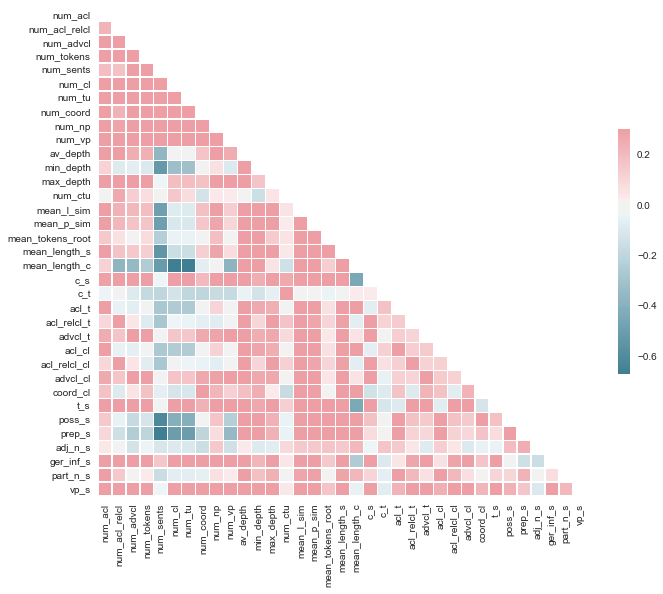

In [154]:
sns.set(style="white")

# Compute the correlation matrix
corr = X_df_best_non.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

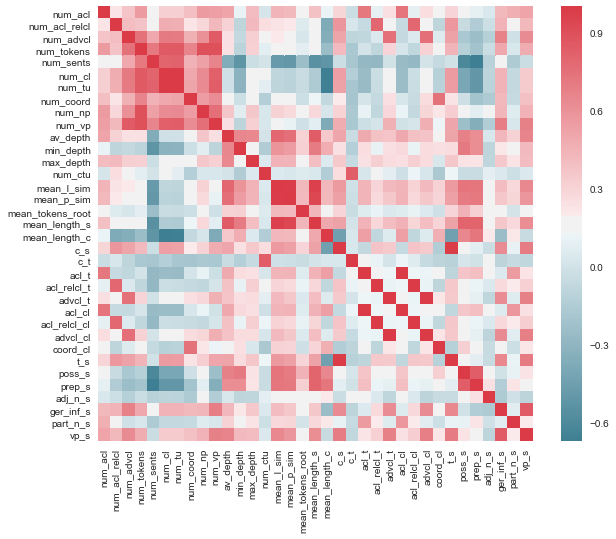

In [155]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [156]:
skf = StratifiedKFold(n_splits=5, shuffle=False, random_state=0)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN (", len(train_index), 'essays ):', train_index, "TEST (", len(test_index), 'essays ):', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN ( 75 essays ): [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 0  1  2  3  4  5  6  7 38 39 40 41 42 43 44 45 46 47 48 49]
TRAIN ( 75 essays ): [ 0  1  2  3  4  5  6  7 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 62 63 64 65 66 67
 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91
 92 93 94] TEST ( 20 essays ): [ 8  9 10 11 12 13 14 15 50 51 52 53 54 55 56 57 58 59 60 61]
TRAIN ( 76 essays ): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 24 25 26 27 28 29 30 31
 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90
 91 92 93 94] TEST ( 19 essays ): [16 17 18 19 20 21 22 23 62 63 64 65 66 67 68 69 70 71 72]
T

# Дерево решений

             precision    recall  f1-score   support

       best       0.40      0.57      0.47         7
    nonbest       0.62      0.45      0.53        11

avg / total       0.54      0.50      0.50        18



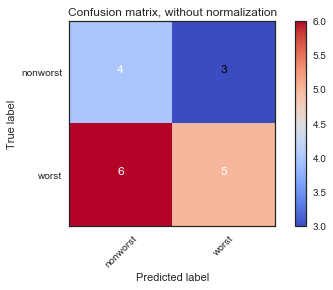

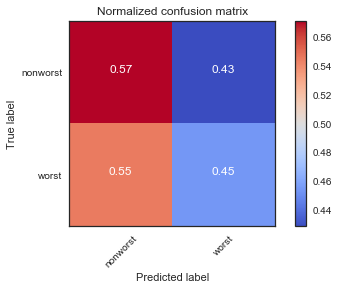

Accuracy:  0.5


In [158]:
parameters = {
    'max_depth': range(1, 101),
    'max_features': range(1, X_df_best_non.shape[1]),
}
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced') 
clf1 = GridSearchCV(clf1, parameters, scoring='accuracy')
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
27    0.250475          coord_cl
2     0.233699         num_advcl
32    0.136352         ger_inf_s
16    0.076742  mean_tokens_root
28    0.069251               t_s
23    0.064870           advcl_t
8     0.062175            num_np
6     0.056960            num_tu
5     0.049475            num_cl
0     0.000000           num_acl
25    0.000000      acl_relcl_cl
22    0.000000       acl_relcl_t
24    0.000000            acl_cl
29    0.000000            poss_s
26    0.000000          advcl_cl
20    0.000000               c_t
30    0.000000            prep_s
31    0.000000           adj_n_s
33    0.000000          part_n_s
21    0.000000             acl_t
17    0.000000     mean_length_s
19    0.000000               c_s
18    0.000000     mean_length_c
1     0.000000     num_acl_relcl
15    0.000000        mean_p_sim
14    0.000000        mean_l_sim
13    0.000000           num_ctu
12    0.000000         max_depth
11    0.000000         min

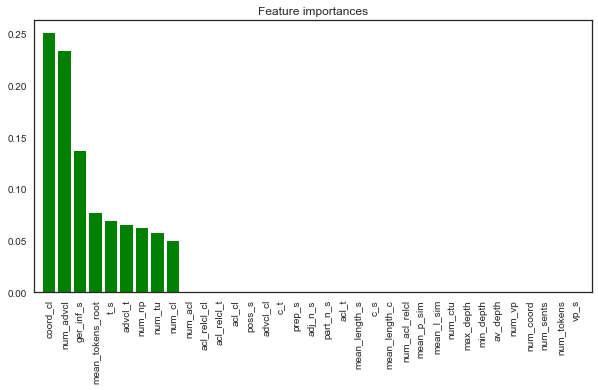

In [159]:
imp(clf1, X_df_best_non.columns)

In [160]:
clf1.best_params_

{'max_depth': 4, 'max_features': 10}

In [161]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=4, max_features=10) 
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

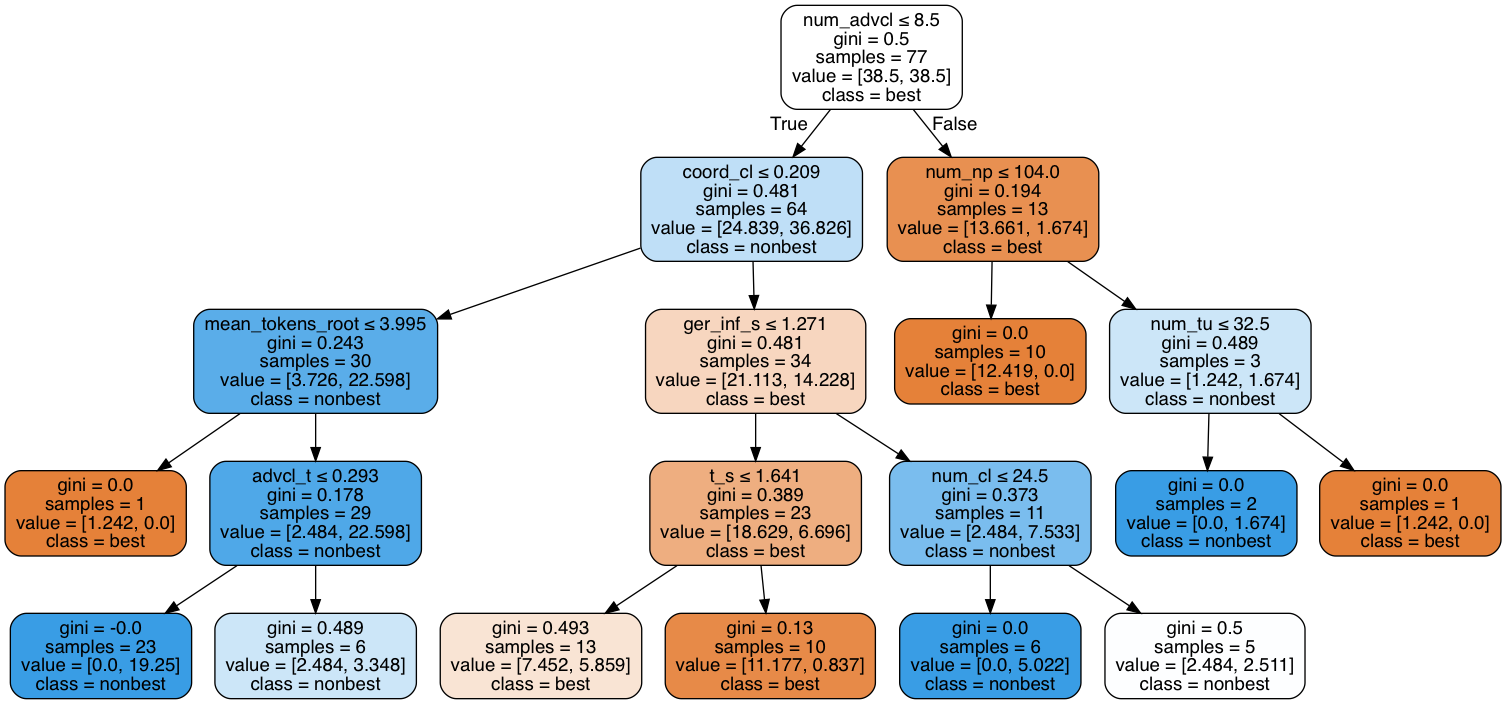

In [162]:
dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_df_best_non.columns,  
                                class_names=clf1.classes_,
                               filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# RandomForestClassifier

In [163]:
y_test_1 = []
for x in y_test:
    if x == 'best':
        y_test_1.append(1)
    else:
        y_test_1.append(0)

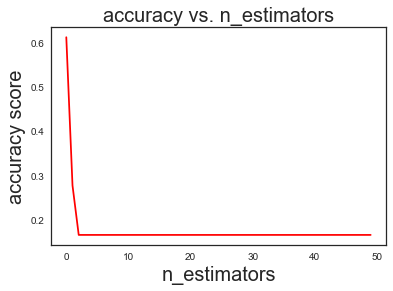

In [164]:
errors = []
growing_rf = RandomForestClassifier(n_estimators=1, warm_start=True, random_state=42)
for i in range(50):
    growing_rf.fit(X_train, y_train)
    growing_rf.n_estimators += 10
    y_pred = growing_rf.predict_proba(X_test)
    errors.append(accuracy_score(y_test_1, y_pred[:, 1].round()))
#accuracy_score(y_true, y_pred.round(), normalize=False)
plt.plot(errors, '-r')
plt.title('accuracy vs. n_estimators', fontsize=20)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('accuracy score', fontsize=20)
plt.show()

In [165]:
parameters = {
    'max_features': range(1, X_df_best_non.shape[1]),
    'max_depth' : range(1, 30),
}
clf2 = RandomForestClassifier(n_estimators=1, random_state=42, class_weight='balanced')
clf2 = GridSearchCV(clf2, parameters, scoring = 'accuracy')
clf2.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': range(1, 35), 'max_depth': range(1, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

             precision    recall  f1-score   support

       best       0.50      0.43      0.46         7
    nonbest       0.67      0.73      0.70        11

avg / total       0.60      0.61      0.60        18



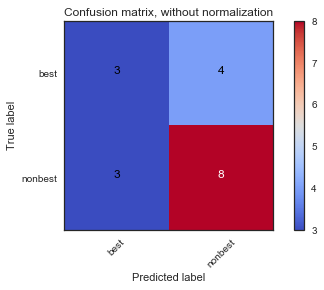

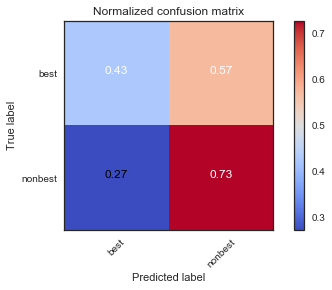

Accuracy:  0.61


In [166]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

Feature ranking:
    importance      name_feature
24    0.282838            acl_cl
1     0.166759     num_acl_relcl
9     0.135368            num_vp
27    0.071909          coord_cl
2     0.068496         num_advcl
16    0.067417  mean_tokens_root
6     0.058556            num_tu
11    0.055151         min_depth
33    0.033471          part_n_s
22    0.028999       acl_relcl_t
17    0.023910     mean_length_s
28    0.007125               t_s
21    0.000000             acl_t
29    0.000000            poss_s
26    0.000000          advcl_cl
25    0.000000      acl_relcl_cl
30    0.000000            prep_s
31    0.000000           adj_n_s
32    0.000000         ger_inf_s
23    0.000000           advcl_t
0     0.000000           num_acl
20    0.000000               c_t
19    0.000000               c_s
18    0.000000     mean_length_c
15    0.000000        mean_p_sim
14    0.000000        mean_l_sim
13    0.000000           num_ctu
12    0.000000         max_depth
10    0.000000          av

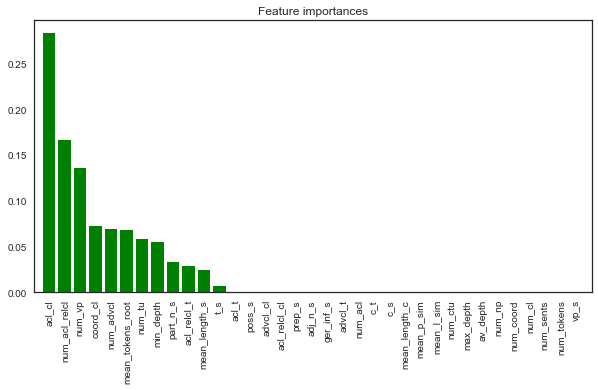

In [167]:
imp(clf2, X_df_best_non.columns)

# LogisticRegression

In [168]:
parameters = {'C': np.logspace(0, 4, 10)}
clf3 = LogisticRegression(penalty='l1')
clf3 = GridSearchCV(clf3, parameters)
clf3.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e+00, 2.78256e+00, 7.74264e+00, 2.15443e+01, 5.99484e+01,
       1.66810e+02, 4.64159e+02, 1.29155e+03, 3.59381e+03, 1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

             precision    recall  f1-score   support

       best       1.00      0.43      0.60         7
    nonbest       0.73      1.00      0.85        11

avg / total       0.84      0.78      0.75        18



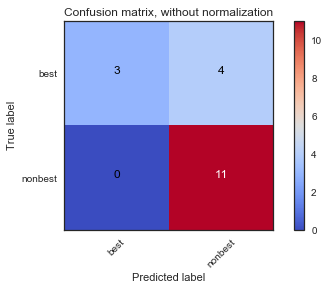

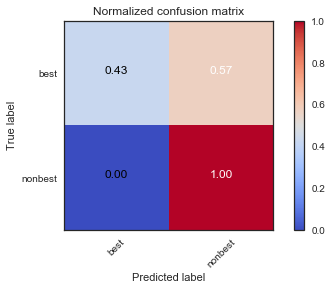

Accuracy:  0.78


In [169]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=clf2.classes_, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
print('Accuracy: ', round(accuracy_score(y_test, y_pred), 2))

In [170]:
clf3.best_params_

{'C': 1.0}

In [171]:
clf3 = LogisticRegression(penalty='l1', C=2.7825594022071245)
clf3.fit(X_train, y_train)

LogisticRegression(C=2.7825594022071245, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Feature ranking:
    importance      name_feature
29  100.000000            poss_s
4    78.290563         num_sents
31   74.327354           adj_n_s
34   65.570952              vp_s
18   49.895537     mean_length_c
6    32.853667            num_tu
17   21.952541     mean_length_s
7    21.299218         num_coord
2    18.327406         num_advcl
1    13.047717     num_acl_relcl
15   10.421883        mean_p_sim
13    7.947909           num_ctu
0     6.539089           num_acl
12    4.851640         max_depth
9     3.971323            num_vp
8     3.404565            num_np
3     1.766011        num_tokens
16    1.164481  mean_tokens_root
25    0.000000      acl_relcl_cl
33    0.000000          part_n_s
32    0.000000         ger_inf_s
30    0.000000            prep_s
28    0.000000               t_s
27    0.000000          coord_cl
26    0.000000          advcl_cl
24    0.000000            acl_cl
14    0.000000        mean_l_sim
23    0.000000           advcl_t
22    0.000000       acl_r

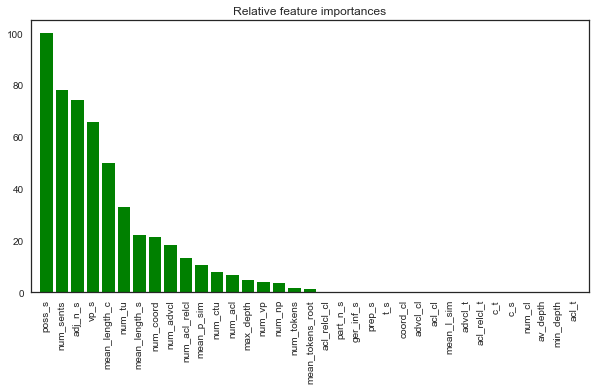

In [172]:
imp2(clf3, X_df_best_non.columns)